In [32]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split

In [33]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [34]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape)
# train set
print("The shape of train_x set is:",train_x.shape)
print("The shape of train_y set is:",train_y.shape)

The shape of train_x set is: (60000, 28, 28, 1)
The shape of train_y set is: (60000,)


In [35]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [36]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape)
# train set
print("The shape of train_x set is:",train_x.shape)
print("The shape of train_y set is:",train_y.shape)

The shape of train_x set is: (60000, 28, 28, 1)
The shape of train_y set is: (60000,)


In [37]:
# test set
print("The shape of test_x set is:",test_x.shape)
print("The shape of test_y set is:",test_y.shape)

The shape of test_x set is: (10000, 28, 28)
The shape of test_y set is: (10000,)


# Loading data for DNN and RNN (LSTM)

In [38]:
def load_data_NN():
  # load mnist dataset
  mnist = tf.keras.datasets.mnist  # 28 x 28 images of 0-9
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # normalize data
  X_train = normalize(x_train, axis = 1)
  x_test = normalize(x_test, axis = 1)
  return x_train, y_train, x_test, y_test

# Loading data for CNN

In [39]:
def load_data_CNN():
  # load mnist dataset
  mnist1 = tf.keras.datasets.mnist  # 28 x 28 images of 0-9
  (x_train, y_train), (x_test, y_test) = mnist1.load_data()
  # reshape data
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  # convert from integers to floats
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  # normalize data
  x_train = normalize(x_train, axis = 1)
  x_test = normalize(x_test, axis = 1)
  return x_train, y_train, x_test, y_test

# Define Model 1 – DNN (Deep Neural Network)

In [40]:
def DNN():
  model_dnn = Sequential()
  model_dnn.add(Flatten())  # input layer
  model_dnn.add(Dense(128, activation = 'relu'))
  model_dnn.add(Dense(128, activation = 'relu'))
  model_dnn.add(Dense(10, activation = 'softmax'))
  model_dnn.compile(optimizer= "adam", 
                  loss= "sparse_categorical_crossentropy", metrics=["accuracy"])
  return model_dnn

# Define Model 2 – RNN (LSTM)

In [41]:
def RNN(input_shape):
  model_rnn = Sequential()
  model_rnn.add(LSTM(128, input_shape=input_shape, activation = 'relu', return_sequences=True))
  model_rnn.add(Dropout(0.2))
  model_rnn.add(LSTM(128, input_shape=input_shape, activation = 'relu'))
  model_rnn.add(Dropout(0.2))
  model_rnn.add(Dense(32, activation = 'relu'))
  model_rnn.add(Dropout(0.2))
  model_rnn.add(Dense(10, activation = 'softmax'))
  model_rnn.compile(optimizer= "adam", 
                  loss= "sparse_categorical_crossentropy", metrics=["accuracy"])
  return model_rnn


# Define Model 3 – CNN (Convolution Neural Network)

In [42]:
def CNN(input_shape):
  model_cnn = Sequential()
  model_cnn.add(Conv2D(32, (3,3),  input_shape = input_shape))
  model_cnn.add(MaxPooling2D(pool_size=(2,2)))
  model_cnn.add(Flatten())  # converts 3D feature maps to 3D feature vectors
  model_cnn.add(Dense(100, activation='relu'))
  model_cnn.add(Dense(10, activation='softmax'))
  model_cnn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam", metrics=["accuracy"])
  return model_cnn

# Prediction Phase

In [43]:
def sample_prediction(index):
  plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')
  pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
  print(np.argmax(pred))

# DNN Model Prediction

nnModel Trainingn
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6803 - accuracy: 0.8736
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.9214
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2454 - accuracy: 0.9401
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816 - accuracy: 0.9515
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1522 - accuracy: 0.9585
nnModel Evaluationn
313/313 [==============================] - 1s 2ms/step - loss: 2.3059 - accuracy: 0.0974
nDNN Model Test accuracy: 0.09740000218153
nnSample Prediction
1/1 [==============================] - 0s 82ms/step
8


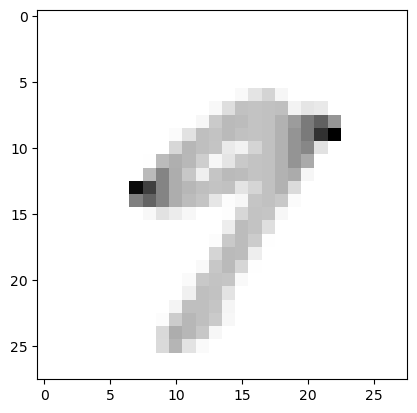

In [46]:
import matplotlib.pyplot as plt
import numpy as np
if __name__ == "__main__":
  # load data
  x_train, y_train, x_test, y_test = load_data_NN()
  # load the model
  model = DNN()
  print("nnModel Trainingn")
  model.fit(x_train, y_train, epochs = 5)
  print("nnModel Evaluationn")
  model.evaluate(x_test, y_test)
  score1 = model.evaluate(x_test, y_test, verbose=1)
  print('n''DNN Model Test accuracy:', score1[1])
  print("nnSample Prediction")
  sample_prediction(20)

# RNN (LSTM) Model Prediction

In [47]:
if __name__ == "__main__":
  # load data
  x_train, y_train, x_test, y_test = load_data_NN()
  # load model
  model = RNN(x_train.shape[1:])
  print("nnModel Trainingn")
  model.fit(x_train, y_train, epochs = 5)
  print("nnModel Evaluationn")
  model.evaluate(x_test, y_test)
  score2 = model.evaluate(x_test, y_test, verbose=1)
  print('n''RNN (LSTM) Model Test accuracy:', score2[1])

nnModel Trainingn
Epoch 1/5
1875/1875 [==============================] - 91s 47ms/step - loss: 14.7675 - accuracy: 0.1076
Epoch 2/5
1875/1875 [==============================] - 90s 48ms/step - loss: 2.3604 - accuracy: 0.1122
Epoch 3/5
1875/1875 [==============================] - 92s 49ms/step - loss: 2.3207 - accuracy: 0.1125
Epoch 4/5
1875/1875 [==============================] - 95s 51ms/step - loss: 2.3296 - accuracy: 0.1123
Epoch 5/5
1875/1875 [==============================] - 91s 49ms/step - loss: 2.3025 - accuracy: 0.1124
nnModel Evaluationn
313/313 [==============================] - 5s 17ms/step - loss: 2.3010 - accuracy: 0.1135
nRNN (LSTM) Model Test accuracy: 0.11349999904632568


# CNN Model Prediction

nnModel Trainingn
Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2262 - accuracy: 0.9322
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0836 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0510 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0253 - accuracy: 0.9921
nnModel Evaluationn
313/313 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9770
nCNN Model Test accuracy: 0.9769999980926514
nnSample Prediction
1/1 [==============================] - 0s 63ms/step
9


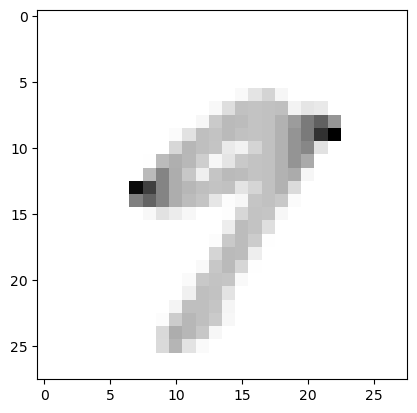

In [48]:
if __name__ == "__main__":
  # load data
  x_train, y_train, x_test, y_test = load_data_CNN()
  # load model
  input_shape = (28,28,1)
  model = CNN(input_shape)
  print("nnModel Trainingn")
  model.fit(x_train, y_train, epochs = 5)
  print("nnModel Evaluationn")
  model.evaluate(x_test, y_test)
  score3 = model.evaluate(x_test, y_test, verbose=1)
  print('n''CNN Model Test accuracy:', score3[1])
  print("nnSample Prediction")
  sample_prediction(20)

# Comparing Model Accuracies

In [50]:
import pandas as pd
results=pd.DataFrame({'Model':['DNN','RNN (LSTM)','CNN'],
                     'Accuracy Score':[score1[1],score2[1],score3[1]]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
CNN,0.9770
RNN (LSTM),0.1135
DNN,0.0974
